<a href="https://colab.research.google.com/github/Sk1kavi/Chronic_Kidney_Disease_Classification/blob/main/Chronic_Kidney_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [33]:
#Read Dataset
df=pd.read_csv("/content/drive/MyDrive/ML - Project/Chronic_Kidney_Dsease_data.csv")

In [20]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [21]:
#checking for null values
df.isna().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
SocioeconomicStatus,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0


In [22]:
#check for existence of garbage value
for col_name in df.select_dtypes(include="object").columns:
  print(df[col_name].value_counts())
  print("*"*40)

DoctorInCharge
Confidential    1659
Name: count, dtype: int64
****************************************


In [27]:
#check for duplicate rows
print("Number of duplicate rows:\n",df[df.duplicated()].shape[0])

Number of duplicate rows:
 0


In [35]:
print(df['Diagnosis'].unique())


[1 0]


In [36]:
df['target'] = df['Diagnosis']

In [37]:
X = df.drop(['PatientID', 'Diagnosis', 'DoctorInCharge', 'target'], axis=1)
y = df['target']


In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [40]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'  # handles class imbalance
)

In [41]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation Accuracy (5-fold):", np.mean(cv_scores))

Cross-validation Accuracy (5-fold): 0.9186154064406299


In [42]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [46]:
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9186746987951807

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.92      1.00      0.96       305

    accuracy                           0.92       332
   macro avg       0.46      0.50      0.48       332
weighted avg       0.84      0.92      0.88       332


Confusion Matrix:
 [[  0  27]
 [  0 305]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


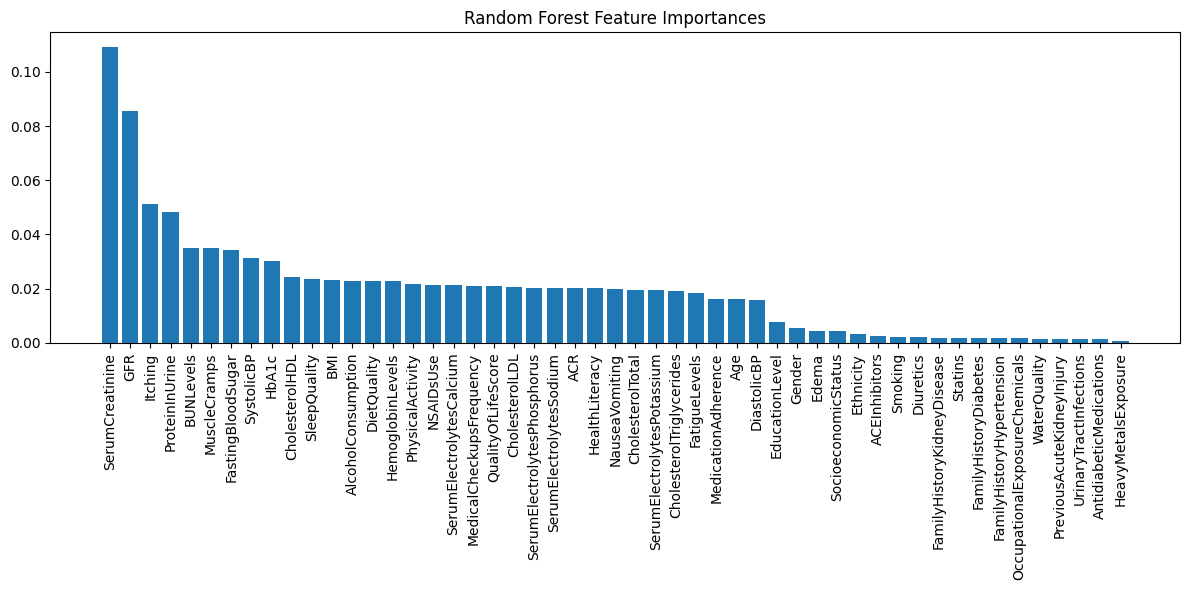

In [44]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Random Forest Feature Importances")
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [47]:

print(y_train.value_counts())


target
1    1219
0     108
Name: count, dtype: int64
